<a href="https://colab.research.google.com/github/SungmanKang/ImageSimilarity/blob/Sun/Image_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import sys
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import os
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [13]:
!git clone https://github.com/SungmanKang/Image-Similarity.git

Cloning into 'Image-Similarity'...


# 2. Load data and image

In [2]:
#read csv
labels = pd.read_csv("/content/drive/MyDrive/image-similarity-bc0atzhw1x-valentino_images.csv")
labels.head()

,image
0,https://www.valentino.com/46/46684212mn_tools_...
1,https://www.valentino.com/11/11886089lu_tools_...
2,https://www.valentino.com/22/22007187or_tools_...
3,https://www.valentino.com/22/22008637px_tools_...
4,https://www.valentino.com/41/41978676fw_tools_...


In [3]:
image_path = labels['image']
print(image_path)

0       https://www.valentino.com/46/46684212mn_tools_...
1       https://www.valentino.com/11/11886089lu_tools_...
2       https://www.valentino.com/22/22007187or_tools_...
3       https://www.valentino.com/22/22008637px_tools_...
4       https://www.valentino.com/41/41978676fw_tools_...
                              ...                        
6906    https://www.valentino.com/16/16095305av_tools_...
6907    https://www.valentino.com/16/16095312pi_tools_...
6908    https://www.valentino.com/45/45637854jo_tools_...
6909    https://www.valentino.com/12/12725105ba_tools_...
6910    https://www.valentino.com/50/50266565tm_tools_...
Name: image, Length: 6911, dtype: object


In [4]:
from PIL import Image
import urllib.request
import time
from io import BytesIO

#req = urllib.request.Request(image_path[1], headers = {"User-Agent" : "Mozilla/5.0"})
#res = urllib.request.urlopen(req).read()

#urlopen_img = Image.open(BytesIO(res))
#urlopen_img

In [6]:
from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    '''
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)
    '''
    '''
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    '''
    req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
    res = urllib.request.urlopen(req).read()
    img_array = np.array(bytearray(res), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    #urlopen_img = Image.open(BytesIO(res))
    return image

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=url_to_image(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image


# 3. Make a model

In [7]:
def model():
    model=Xception(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
        #model.summary()
    return model

In [8]:
def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

In [9]:
def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])

    print(indices)
    return(indices)

In [10]:
def input_show(data):
    plt.title("Query Image")
    plt.imshow(data)
    plt.show()
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(url_to_image(image_path[index_result]))
        
        #plt.imshow(url_to_image(image_path[61]))
    plt.show()

# 4. Result

1/1 [==============================] - 0s 19ms/step
[[20 81 51  2  3 88 91 59 58 32 66 27]]


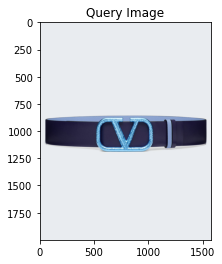

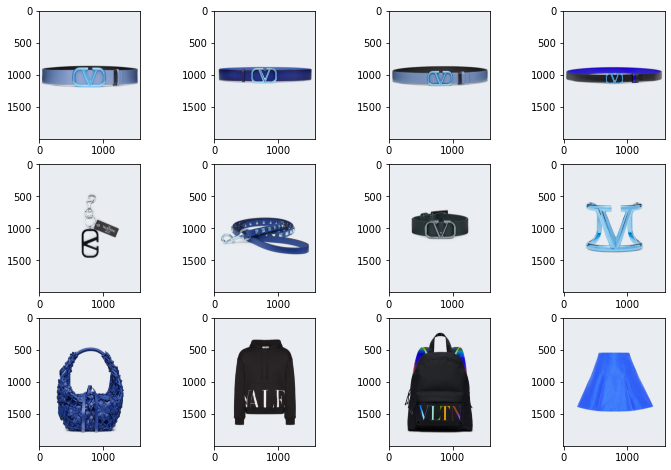

In [12]:
#preprocess_img(image_path[2])
features=[]
main_model=model()

for i in image_path[:99]:
    new_img = preprocess_img(i)
    features.append(feature_extraction(new_img,main_model))
feature_vec = np.array(features)
result=result_vector_cosine(main_model,feature_vec,preprocess_img(image_path[100]))
input_show(url_to_image(image_path[100]))
show_result(image_path[:100],result)